# Introdução


Análise fatorial é uma técnica estatística multivariada que tem como objetivo identificar as principais estruturas subjacentes a um conjunto de variáveis observadas. Essa técnica é muito utilizada em pesquisas de psicologia, educação, marketing, economia, entre outras áreas, para reduzir a complexidade de um grande número de variáveis em um número menor de fatores ou componentes principais que expliquem a maior parte da variação total dos dados.

Por exemplo, imagine que você tem um questionário com muitas perguntas e quer saber se as respostas estão relacionadas entre si. A análise fatorial ajuda a encontrar quais perguntas têm respostas parecidas e agrupá-las em grupos menores. Isso facilita a interpretação dos resultados e ajuda a entender melhor como as diferentes perguntas estão relacionadas.

Nesse notebook veremos um exemplo de análise fatorial utilizando um banco de dados com respostas de um questionário BFI (Big Five Inventory)

# Importação e tratamento inicial

In [25]:
# Para a análise fatorial vamos precisar instalar a biblioteca factor_analyzer
! pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Em nosso exemplo, iremos utilizar um questionário BFI. 

É um teste utilizado em psicologia para avaliar os traços de personalidade das pessoas com base em cinco grandes dimensões:

* abertura a experiências;
* conscienciosidade;
* extroversão;
* amabilidade;
* neuroticismo.

O BFI é um instrumento bastante utilizado em pesquisas sobre personalidade, tanto em estudos acadêmicos quanto em pesquisas de mercado. Ele pode ajudar a entender melhor como as pessoas pensam, sentem e se comportam em diferentes situações e como essas características se relacionam com outros aspectos da vida, como saúde mental, desempenho acadêmico e sucesso profissional.

In [27]:
df= pd.read_csv("bfi.csv")

In [28]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [29]:
# Excluir colunas desnecessárias
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)

In [30]:
# Excluir valores nulos
df.dropna(inplace=True)

In [31]:
df.head(10)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
6,2.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0,...,1.0,2.0,2.0,1.0,1.0,5.0,2,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
9,2.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,2.0,1.0,...,5.0,5.0,5.0,2.0,4.0,5.0,1,5.0,5.0,2.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0


In [32]:
df.shape

(2436, 25)

# Análise fatorial

## Análise exploratória

O teste de esfericidade de Bartlett é uma estatística utilizada para avaliar se a matriz de correlação das variáveis é uma matriz de correlação esférica, ou seja, todas as variáveis estão igualmente correlacionadas entre si. Em outras palavras, o teste avalia se as correlações entre as variáveis são significativamente diferentes de zero. Caso sim, isso significa que as variáveis estão relacionadas entre si e podem ser agrupadas em fatores. Se o valor p do teste de Bartlett for menor que o nível de significância escolhido (geralmente 0,05), rejeitamos a hipótese nula e concluímos que a matriz de correlação não é esférica e, portanto, é adequada para a análise fatorial.

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235022, 0.0)

O KMO (Kaiser-Meyer-Olkin) é uma medida de adequação amostral utilizada na análise fatorial exploratória para avaliar se os dados são adequados para essa técnica. É uma estatística que varia de 0 a 1, onde valores mais próximos de 1 indicam que os dados são mais adequados para a análise fatorial.

O KMO é calculado a partir da matriz de correlação das variáveis e mede a proporção de variância comum entre as variáveis que pode ser extraída por meio dos fatores. Ele avalia se as correlações entre as variáveis são fortes o suficiente para justificar a extração dos fatores e se os dados são adequados para a análise fatorial exploratória.

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468395

Os autovalores são uma medida da quantidade de variância explicada por cada fator. Na análise fatorial, a ideia é resumir a informação contida em um grande número de variáveis observadas em um número menor de fatores latentes.

Cada fator é uma combinação linear das variáveis observadas, e a ideia é que os fatores expliquem a maior parte da variância nas variáveis observadas. Os autovalores são calculados a partir da matriz de correlação das variáveis observadas e medem a variância explicada por cada fator.Em geral, os autovalores maiores que 1 são considerados relevantes e indicam que o fator explica mais variância do que uma variável individual.

Além disso, os autovalores podem ser utilizados para determinar o número de fatores a serem extraídos. Uma abordagem comum é a "regra do ponto de quebra" ou "critério de Kaiser", que sugere extrair apenas os fatores com autovalores maiores que 1. Outra abordagem é a análise de scree plot, que exibe a relação entre o número de fatores e os autovalores e sugere o número de fatores a partir do ponto em que os autovalores caem abruptamente.

In [35]:
# Criamos um objecto de Análise Fatorial e rodamos a análise
fa = FactorAnalyzer()
fa.fit(df)
# Verificamos os autovalores
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

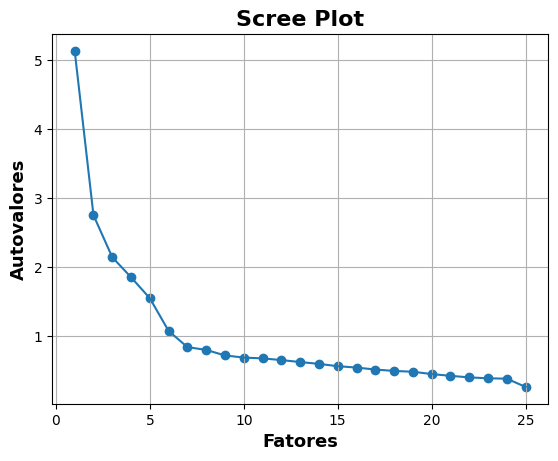

In [36]:
# Scree plot
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot', fontdict={'fontsize':16, 'weight':'bold'})
plt.xlabel('Fatores',fontdict={'fontsize':13, 'weight':'bold'})
plt.ylabel('Autovalores', fontdict={'fontsize':13, 'weight':'bold'})
plt.grid()
plt.show()

Da análise exploratória, podemos começar testando com 6 fatores latentes. 

## Resultados

As cargas fatoriais são coeficientes que indicam a relação entre cada variável observada e cada fator latente extraído. Esses coeficientes são calculados durante o processo de extração dos fatores e indicam o quanto cada variável contribui para a formação de cada fator.

São expressos em valores numéricos que variam de -1 a 1 e indicam a direção e a intensidade da relação entre a variável e o fator. Valores positivos indicam uma relação direta (ou seja, quando uma variável aumenta, o fator também aumenta) e valores negativos indicam uma relação inversa (ou seja, quando uma variável aumenta, o fator diminui).

Valores absolutos altos de cargas fatoriais indicam que a variável está fortemente associada ao fator e pode ser considerada uma boa medida do fator. Valores absolutos baixos indicam que a variável não está bem relacionada ao fator e pode ser removida do modelo.

É comum considerar 0.3 como ponto de corte para as cargas fatoriais.



A análse exploratória indicou que podemos decompor em 6 fatores. Vamos testar com esse valor inicialmente.

In [37]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

Vamos criar uma função para printar os fatores na tela

In [38]:
def print_loadings(columns: list[str], loadings:np.ndarray):
  num_factors = loadings.shape[-1]
  head = "Coluna\t\t" + "\t\t".join([f"Fator{i+1}" for i in range(num_factors)])
  print(head)
  for index, loading in enumerate(loadings):
    print(f"{columns[index]}\t\t"+"\t\t".join([str(round(l,4)) for l in loading]))

In [40]:
print_loadings(df.columns, fa.loadings_)

Coluna		Fator1		Fator2		Fator3		Fator4		Fator5		Fator6
A1		0.0952		0.0408		0.0487		-0.531		-0.1131		0.1612
A2		0.0331		0.2355		0.1337		0.6611		0.0637		-0.0062
A3		-0.0096		0.343		0.1214		0.6059		0.034		0.1601
A4		-0.0815		0.2197		0.2351		0.4046		-0.1253		0.0864
A5		-0.1496		0.4145		0.1064		0.4697		0.031		0.2365
C1		-0.0044		0.0772		0.5546		0.0075		0.1901		0.095
C2		0.0683		0.0384		0.6745		0.0571		0.0876		0.1528
C3		-0.04		0.0319		0.5512		0.1013		-0.0113		0.009
C4		0.2163		-0.0662		-0.6385		-0.1026		-0.1438		0.3184
C5		0.2842		-0.1808		-0.5448		-0.06		0.0258		0.1324
E1		0.0223		-0.5905		0.0539		-0.1309		-0.0712		0.1566
E2		0.2336		-0.6846		-0.0885		-0.1167		-0.0456		0.1151
E3		-0.0009		0.5568		0.1034		0.1794		0.2412		0.2673
E4		-0.1368		0.6584		0.1138		0.2411		-0.1078		0.1585
E5		0.0345		0.5075		0.3098		0.0788		0.2008		0.0087
N1		0.8058		0.068		-0.0513		-0.1748		-0.075		-0.0963
N2		0.7898		0.023		-0.0375		-0.1411		0.0067		-0.1398
N3		0.7251		-0.0657		-0.059		-0.0192		-0.0107		0.0625
N4	

Mas observe que as cargas fatorias do Fator 6 foram todas baixas, poucas acima de 0.3. Isso é um indicativo de que talvez o Fator 6 não seja relevante, e que podemos explicar as variáveis apenas com 5 fatores. E, de fato, isso corrobora com a teoria do Big Five, a qual diz que podemos agrupar a personalidade em 5 grandes dimensões. 

Vejamos a mesma análise agora utilizando 5 fatores.

In [41]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df)
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.65074261,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.0878692 ,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582379,  0.03887794,  0.20958365],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.0649837 , -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481258, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087734],
       [-0.11561383,  0.64683266,  0.1

In [42]:
print_loadings(df.columns, fa.loadings_)

Coluna		Fator1		Fator2		Fator3		Fator4		Fator5
A1		0.1111		0.0405		0.0228		-0.4282		-0.0779
A2		0.0296		0.2137		0.139		0.6269		0.0621
A3		0.0094		0.3178		0.1093		0.6507		0.0562
A4		-0.0665		0.2046		0.2306		0.4356		-0.1127
A5		-0.1221		0.393		0.0879		0.5371		0.0667
C1		0.0104		0.0702		0.5458		0.0389		0.2096
C2		0.0896		0.0333		0.6487		0.1028		0.1154
C3		-0.0309		0.0239		0.557		0.1116		-0.0052
C4		0.2404		-0.065		-0.6338		-0.0375		-0.1075
C5		0.2903		-0.1764		-0.5625		-0.0475		0.0368
E1		0.0428		-0.5748		0.0331		-0.1048		-0.0588
E2		0.2447		-0.6787		-0.1025		-0.1125		-0.042
E3		0.0242		0.5368		0.083		0.2579		0.2809
E4		-0.1156		0.6468		0.102		0.3061		-0.0734
E5		0.0361		0.5041		0.3129		0.0904		0.2137
N1		0.7868		0.0789		-0.046		-0.2164		-0.0847
N2		0.7541		0.0273		-0.0306		-0.1937		-0.0103
N3		0.7317		-0.0614		-0.0671		-0.0277		-0.0042
N4		0.5906		-0.3454		-0.1789		0.0059		0.0752
N5		0.5379		-0.1613		-0.0373		0.1009		-0.1498
O1		-0.0022		0.213		0.1151		0.0616		0.5049
O2		0.1758		0.0046		

Vemos que os resultados foram bem consistentes. Cada grupo de variáveis agrupadas segundo a teoria do Big Five foi, de fato, associado a um fator calculado pela análise fatorial.

Em resumo:

* Fator 1 = neuroticismo
* Fator 2 = extroversão
* Fator 3 = conscienciosidade
* Fator 4 = amabilidade
* Fator 5 = abertura a experiências